# **Calculating fairness statistics**

I decided to look at the 'credit scoring' dataset. The protected variable, according to which I am calculating fairness statistcs is age - more precisely, whether someone is very young (under 30). I am using two tree-based models - XGBoost and Random Forest Classifier. It seems that the models might be biased against younger people.

# **Task 1**
* Demographic parity: $\frac{0.65}{0.5}=1.3$
* Equal opportunity: $\frac{0.75}{0.5}=1.5$
* Predictive parity: $\frac{\frac{60}{65}}{0.5} \approx 1.8$ 


# **Task 2**

### **Subtask 2**



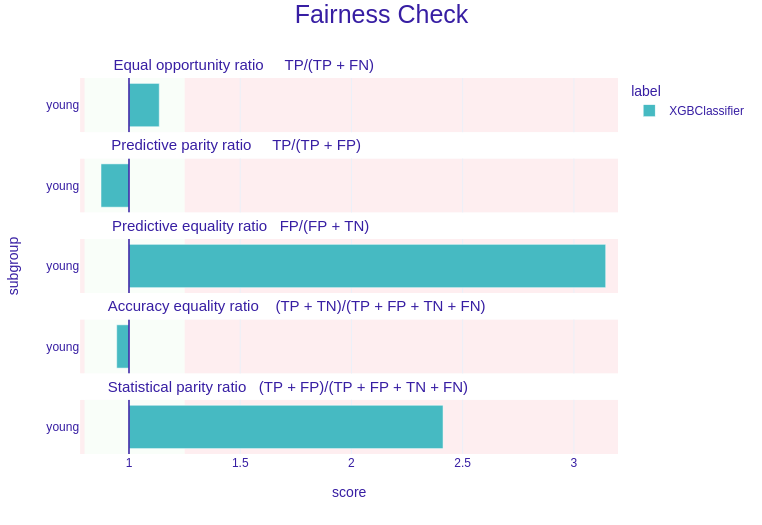



In the plot, we can observe that according to such coefficients as equal opportunity and predictive parity, the model doesn't discriminate against young people. The statistical parity ratio shows us that the model might be biased against young people - it predicts credit problems for them more often than for members of the older population.

### **Subtask 3**


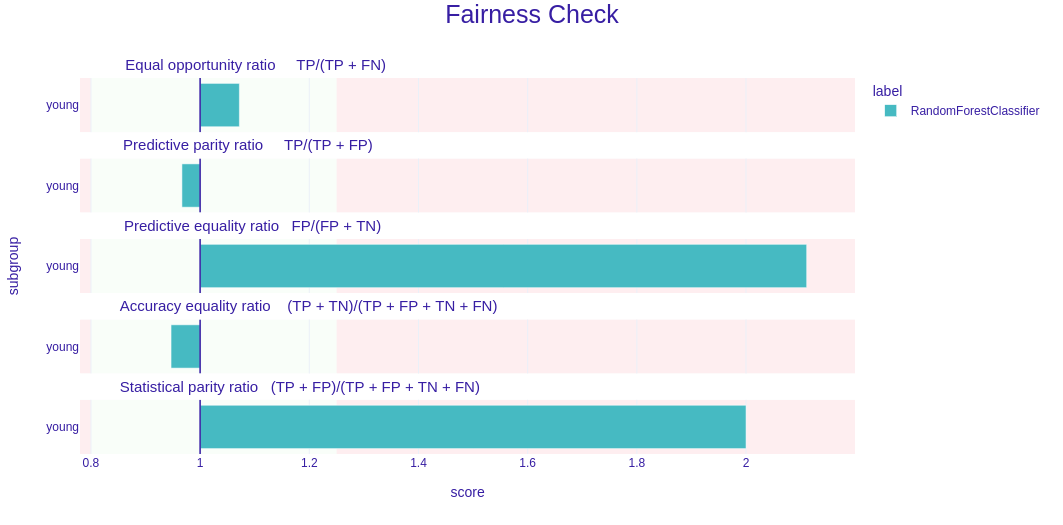

I trained Random Forest Classifier. When looking at this plot and the one from the previous task it seems a little better - statistical parity ratio is a bit smaller and so is the equal opportunity ratio. Performance of two models is similar, but XGBoost is a bit better. Random forest has AUC 0.8304 and accuracy 0.9353 and XGBoost AUC 0.8516 and accuracy 0.9373.

### **Subtask 4**
I removed the age variable and applied the resampling technique. Removing the age doesn't help much with the statistical parity ratio. The variable might be correlated with a number of other variables - such as for instance the number of dependants. Luckily applying resampling helps a lot with faireness, as is visible on the plot. Performance doesn't differ much from XGBoost, but is a little bit worse - AUC is 0.8469 and accuracy 0.9331.

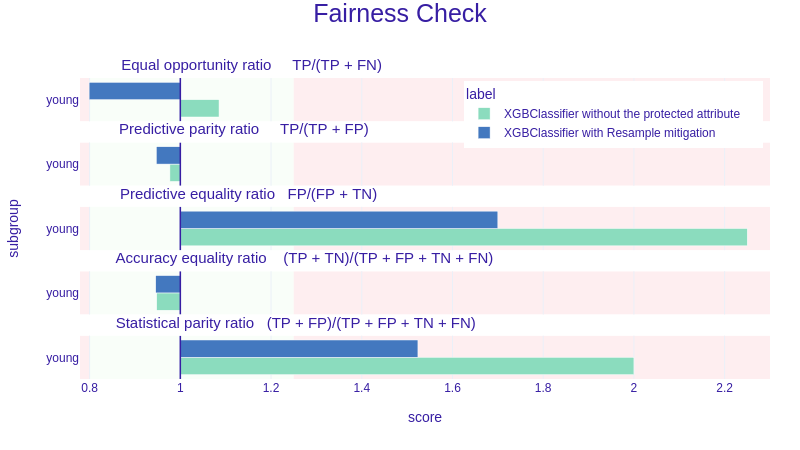

### **Subtask 5**
All three models (XGBoost, Random Forest Classifier, XGBoost + resampling) have accuracy of around 0.935. XGBoost and Random Forest Classifier are similarly 'unfair', but XGBoost with resampling is much better in this aspect. Therefore there isn't much correlation between fairness and model performance, but if anything, it seems as the more fair models would perform worse.

## **Appendix**
Contains the Python code used to create the above raport


# **Dataset**
This dataset contains the data about the scores of students of two different school in Portugal in math and Portuguese. The goal is to predict the final score of a student, using information about their lifestyle and background. I am going to focus only on predicting G3 - according to the description of the problem G1 and G2 are highly correlated with G3.  

### **Imports**
We need to install the necessary modules.

In [6]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now import everything that is necessary.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dalex as dx
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV

Set the seeds for reproducibility.

In [8]:
np.random.seed(10)
random.seed(10)

### **Data preparation**
We will start by reading the data.

In [9]:
credit_df = pd.read_csv('cs-training.csv').dropna()
credit_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,2,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,3,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,4,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,5,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


Split into features and targets. The same as in the previous homework, we focus on predicting the final result only.

In [10]:
credit_x = credit_df.drop(['SeriousDlqin2yrs'], axis = 1)
credit_y = credit_df[['SeriousDlqin2yrs']]

x_train, x_val, y_train, y_val = train_test_split(credit_x, credit_y)

In [11]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

## **Homework implementation**
Below the code used for solving each of the required homework tasks is contained.

### **Subtask 1**

We train two models XGBoost and random forest model. We train on the whole dataset, since there isn't much data and it shouldn't matter for the explanations.

In [12]:
models = {
    'Boosting': XGBClassifier(),
    'Forest': RandomForestClassifier()
  }

for name, model in models.items():
    model.fit(x_train, y_train.values.ravel())

AUC Score 0.8239773139585306
Accuracy 0.93343653250774


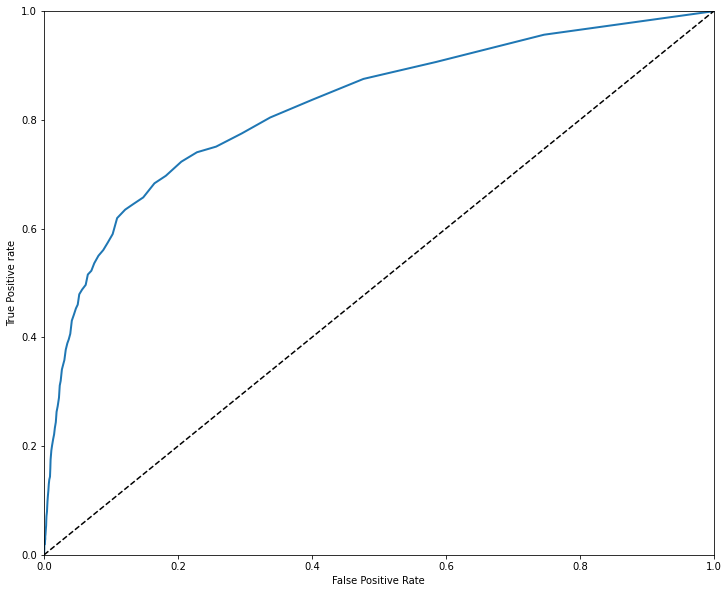

In [13]:
y_scores_proba = models["Forest"].predict_proba(x_val)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_val, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores)))
print("Accuracy {}".format(accuracy_score(y_val,models["Forest"].predict(x_val))))

AUC Score 0.8482518650607529
Accuracy 0.9328411526553941


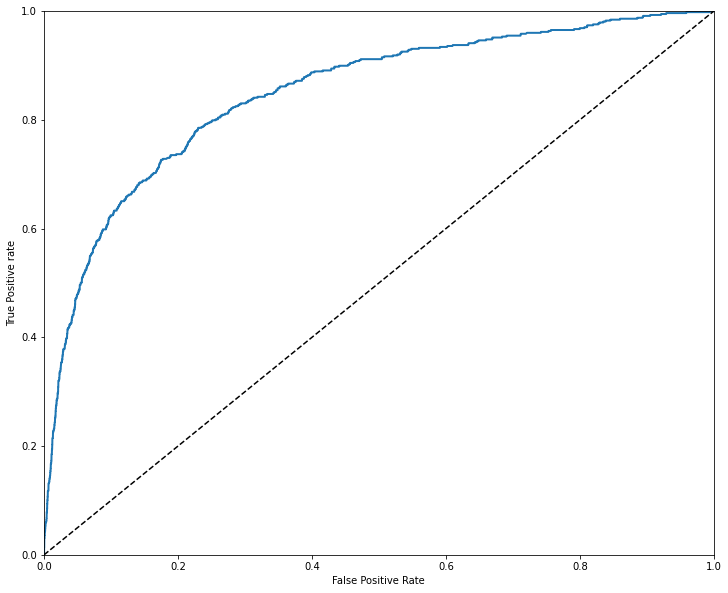

In [14]:
y_scores_proba = models["Boosting"].predict_proba(x_val)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_val, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores)))
print("Accuracy {}".format(accuracy_score(y_val,models["Boosting"].predict(x_val))))

### **Subtask 2**
I will compute the coefficients for age as the protected variable.

In [15]:
def pf_xgboost_classifier_categorical(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict_proba(df)[:, 1]


explainer = dx.Explainer(models['Boosting'], x_val, y_val, predict_function = pf_xgboost_classifier_categorical)

Preparation of a new explainer is initiated

  -> data              : 8398 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 8398 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7f21c9336a60> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00299, mean = 0.0677, max = 0.852
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.805, mean = 0.0011, max = 0.994
  -> model_info        : package xgboost

A new explainer has been created!


In [16]:
protected_variable = x_val["age"].apply(lambda x: "old" if x > 30 else "young")
privileged_group = "old"

fobject = explainer.model_fairness(
    protected=protected_variable,
    privileged=privileged_group
)

fobject.fairness_check()

Bias detected in 3 metrics: PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'old'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
            TPR       ACC       PPV   FPR       STP
young  0.833333  0.955128  0.795699  2.25  1.611111


In [17]:
fobject.plot()

### **Subtask 3**
Fairness statistics for random forest.

In [18]:
explainer_forest = dx.Explainer(models['Forest'], x_val, y_val, predict_function = pf_xgboost_classifier_categorical)

fobject = explainer_forest.model_fairness(
    protected=protected_variable,
    privileged=privileged_group
)

fobject.fairness_check()

Preparation of a new explainer is initiated

  -> data              : 8398 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 8398 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7f21c9336a60> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.0721, max = 0.86
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.76, mean = -0.00324, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more 

In [19]:
fobject.plot()

### **Subtask 4**
To mitigate the bias, I will delete information about dependents.

In [20]:
x_train_without_prot, x_val_without_prot = x_train.drop("age", axis=1), x_val.drop("age", axis=1)

model_without_prot = XGBClassifier()

model_without_prot.fit(x_train_without_prot, y_train)

explainer_without_prot = dx.Explainer(
    model_without_prot, 
    x_val_without_prot, 
    y_val,
    predict_function=pf_xgboost_classifier_categorical,
    label="XGBClassifier without the protected attribute",
    verbose=False
)

fobject_without_prot = explainer_without_prot.model_fairness(protected_variable, privileged_group)

fobject.plot(fobject_without_prot, show=False).\
    update_layout(autosize=False, width=800, height=450, legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AUC Score 0.8495429163089939
Accuracy 0.9326030007144558


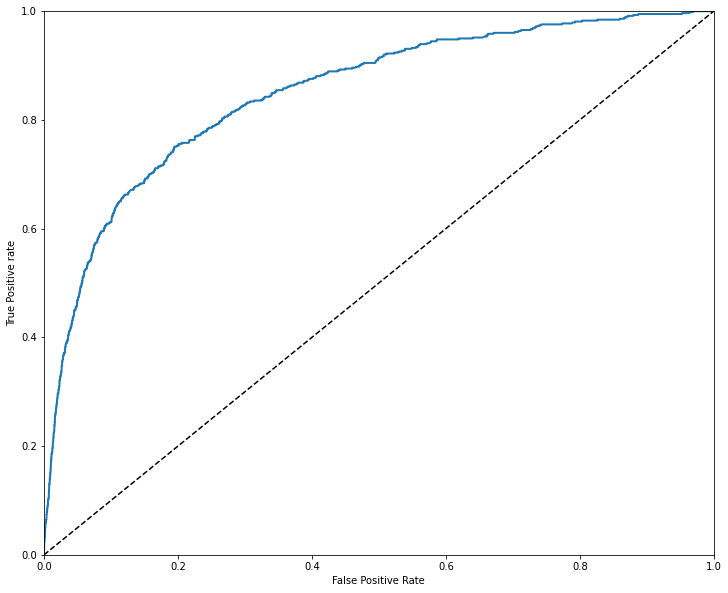

In [21]:
y_scores_proba = model_without_prot.predict_proba(x_val_without_prot)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_val, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores)))
print("Accuracy {}".format(accuracy_score(y_val,model_without_prot.predict(x_val_without_prot))))

In [22]:
from dalex.fairness import resample
from copy import copy

protected_variable_train = x_train["age"].apply(lambda x: "old" if x > 30 else "young")

In [23]:
indices_resample = resample(
    protected_variable_train, 
    y_train, 
    type='preferential', # uniform
    probs=model_without_prot.predict_proba(x_train_without_prot)[:, 1], # requires probabilities
    verbose=False
)
model_resample = copy(model_without_prot)
model_resample.fit(x_train_without_prot.iloc[indices_resample, :], y_train.iloc[indices_resample])
explainer_resample = dx.Explainer(
    model_resample, 
    x_val_without_prot, 
    y_val, 
    label='XGBClassifier with Resample mitigation',
    verbose=False
)
fobject_resample = explainer_resample.model_fairness(
    protected_variable, 
    privileged_group
)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [24]:
fobject_without_prot.plot([fobject_resample], show=False).\
    update_layout(autosize=False, width=800, height=450, legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99))

AUC Score 0.8468664545703946
Accuracy 0.9330793045963325


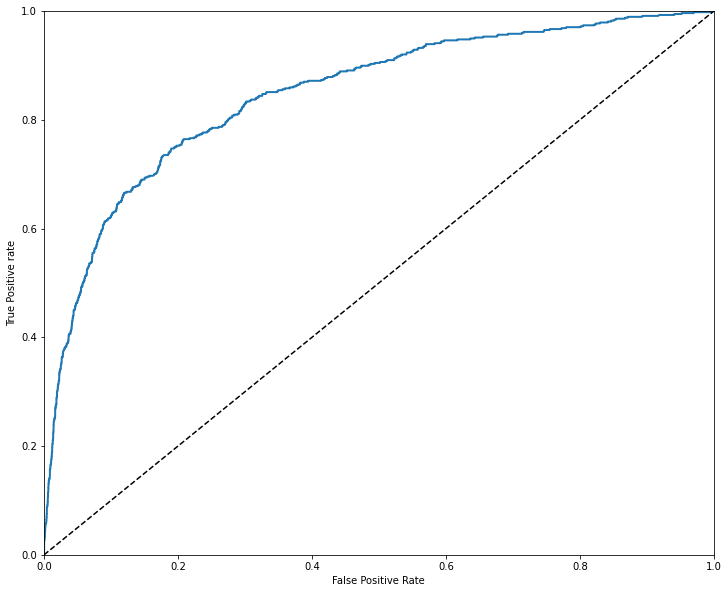

In [25]:
y_scores_proba = model_resample.predict_proba(x_val_without_prot)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_val, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores)))
print("Accuracy {}".format(accuracy_score(y_val,model_resample.predict(x_val_without_prot))))